# Heart Failure Prediction Analysis

**AICTE Faculty ID:** 1-3241967546  
**Faculty Name:** Milav Jayeshkumar Dabgar  
**Date:** July 17, 2025

---

## Objective
Analyze heart failure clinical records to predict death events and understand risk factors.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

plt.style.use('default')
print("Libraries imported successfully!")

Libraries imported successfully!


## Load and Explore Data

In [2]:
# Load dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

print(f"Dataset shape: {df.shape}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset shape: (299, 13)

Column names:
['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']

First 5 rows:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Dataset information
print("Dataset Info:")
print(df.info())
print("\nStatistical Summary:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
# Check target variable
print("Death Event distribution:")
print(df['DEATH_EVENT'].value_counts())
print("\nPercentage:")
print(df['DEATH_EVENT'].value_counts(normalize=True) * 100)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

Death Event distribution:
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

Percentage:
DEATH_EVENT
0    67.892977
1    32.107023
Name: proportion, dtype: float64

Missing values:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


## Data Visualization

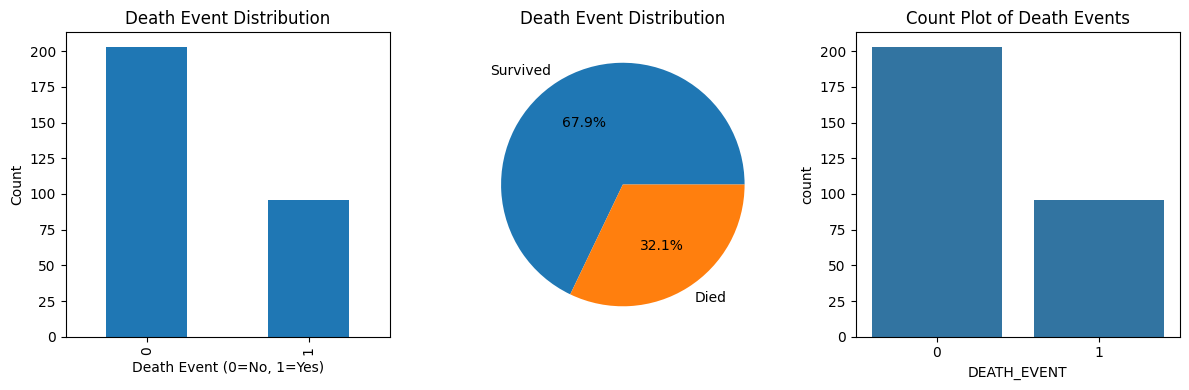

In [5]:
# Target distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
df['DEATH_EVENT'].value_counts().plot(kind='bar')
plt.title('Death Event Distribution')
plt.xlabel('Death Event (0=No, 1=Yes)')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.pie(df['DEATH_EVENT'].value_counts(), labels=['Survived', 'Died'], autopct='%1.1f%%')
plt.title('Death Event Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Count Plot of Death Events')

plt.tight_layout()
plt.show()

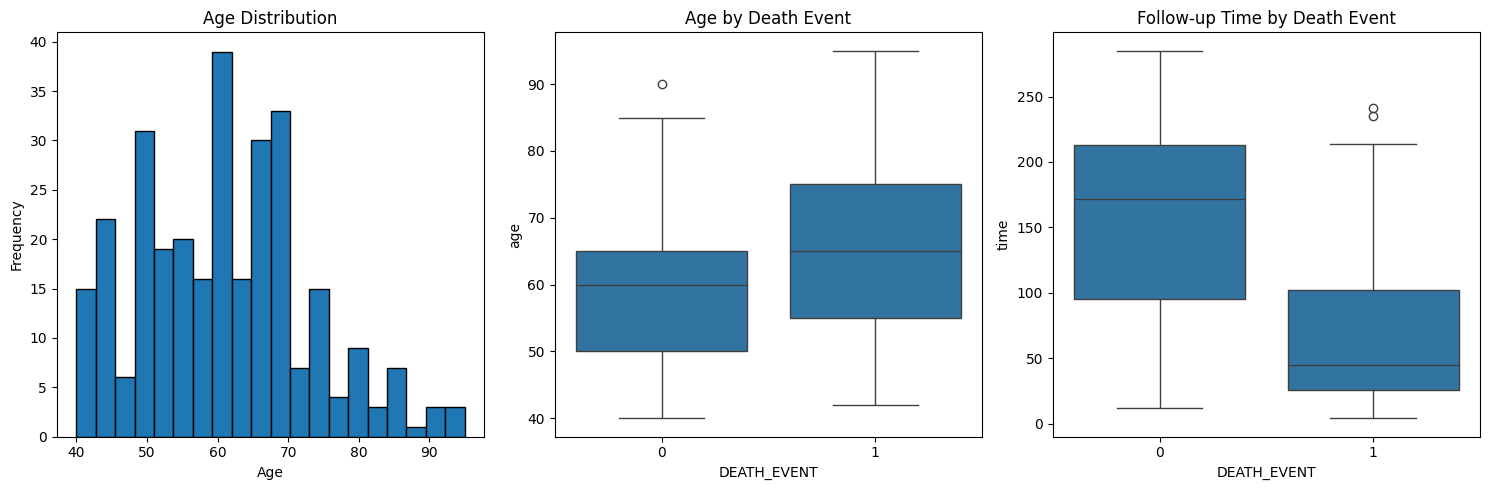

In [6]:
# Age and time analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.boxplot(x='DEATH_EVENT', y='age', data=df)
plt.title('Age by Death Event')

plt.subplot(1, 3, 3)
sns.boxplot(x='DEATH_EVENT', y='time', data=df)
plt.title('Follow-up Time by Death Event')

plt.tight_layout()
plt.show()

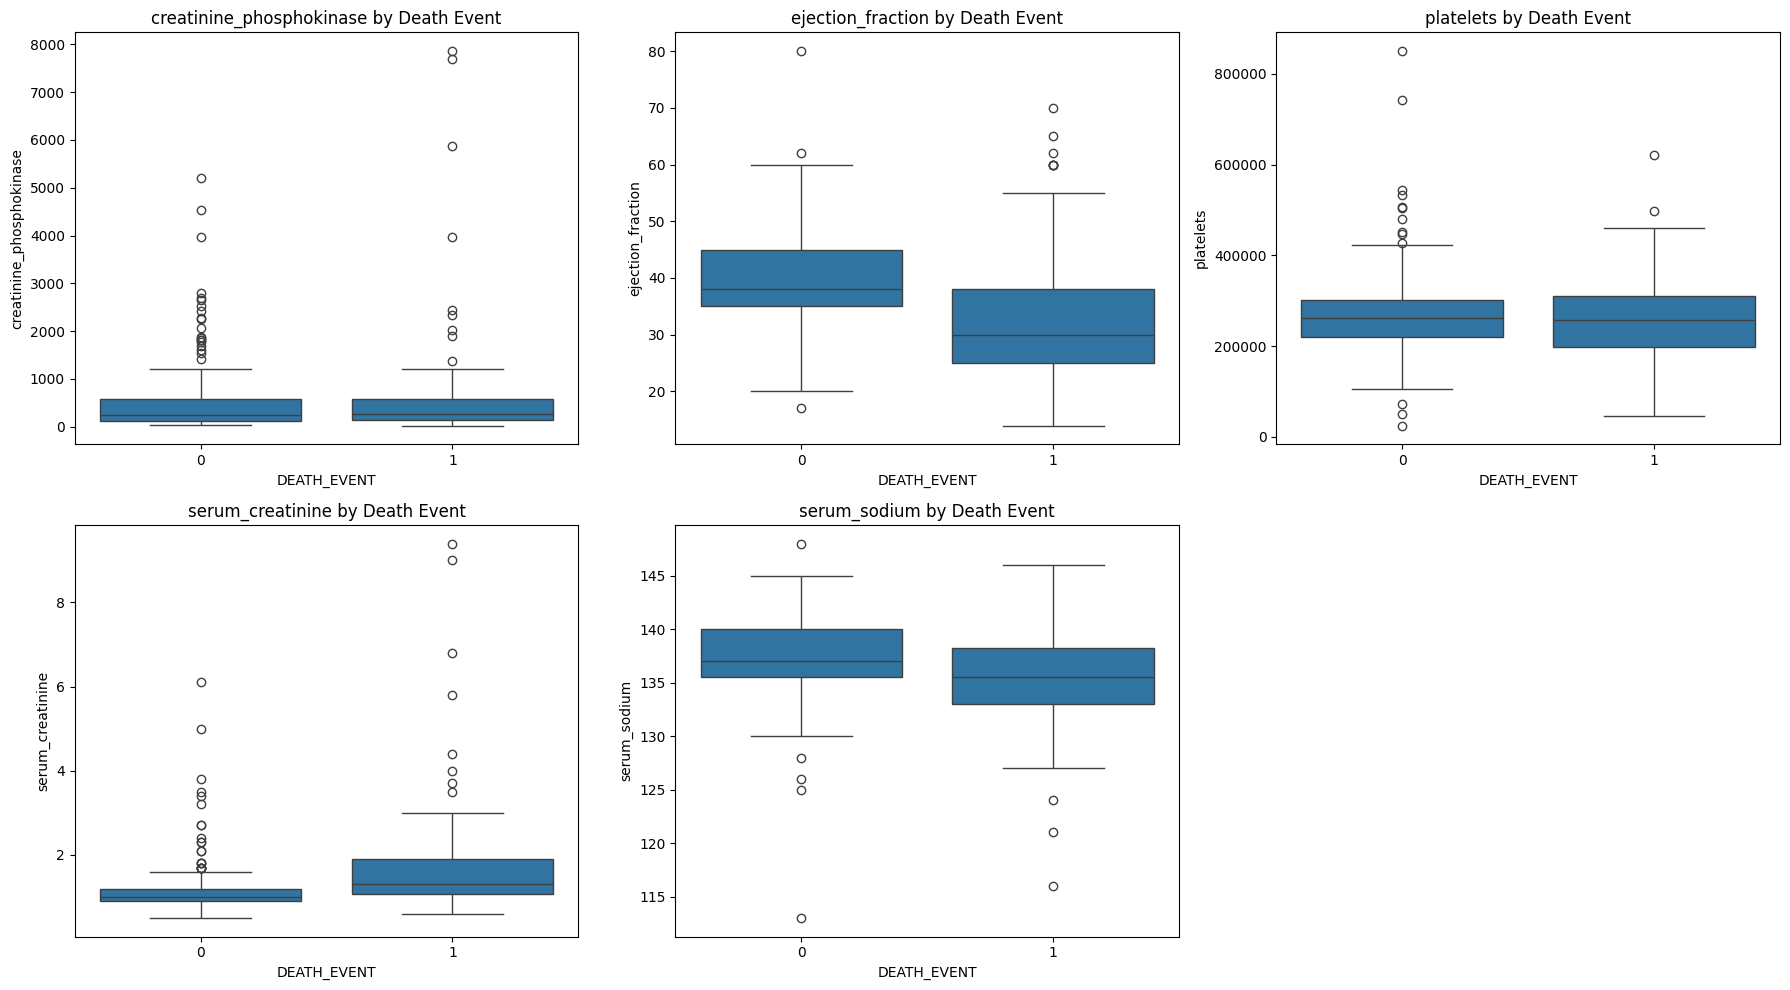

In [7]:
# Clinical features analysis
clinical_features = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(clinical_features):
    sns.boxplot(x='DEATH_EVENT', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} by Death Event')

# Remove empty subplot
axes[5].remove()

plt.tight_layout()
plt.show()

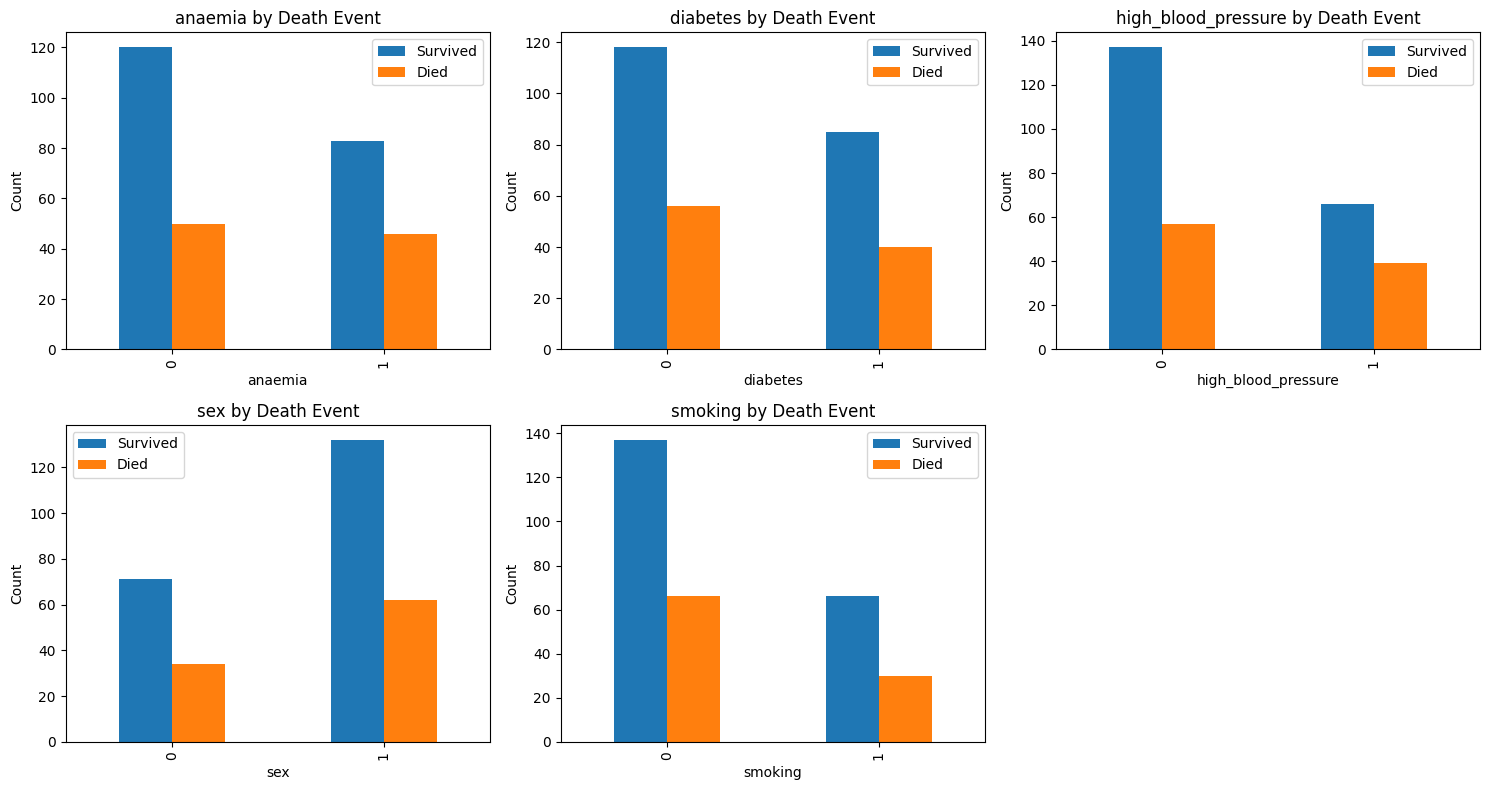

In [8]:
# Binary features analysis
binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, feature in enumerate(binary_features):
    ct = pd.crosstab(df[feature], df['DEATH_EVENT'])
    ct.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{feature} by Death Event')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].legend(['Survived', 'Died'])

# Remove empty subplot
axes[5].remove()

plt.tight_layout()
plt.show()

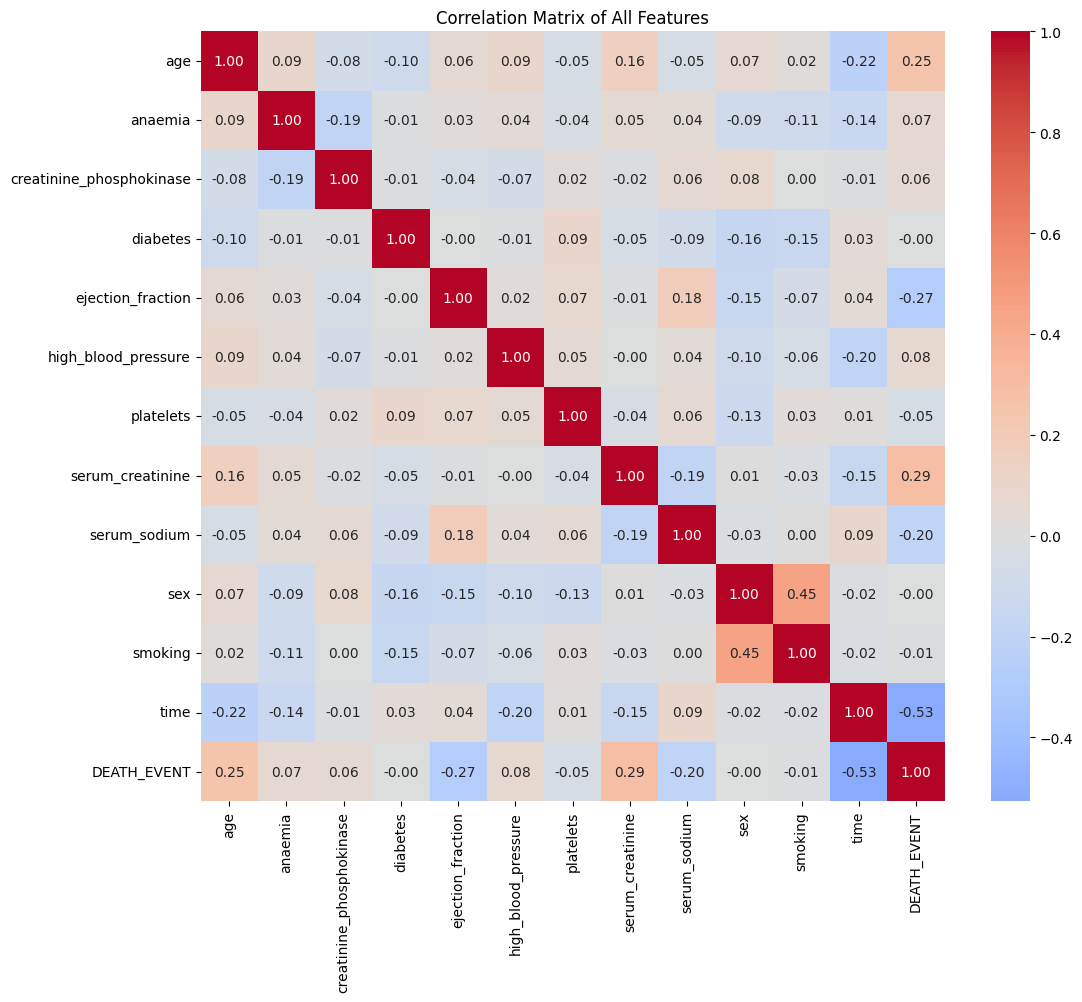

In [9]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of All Features')
plt.show()

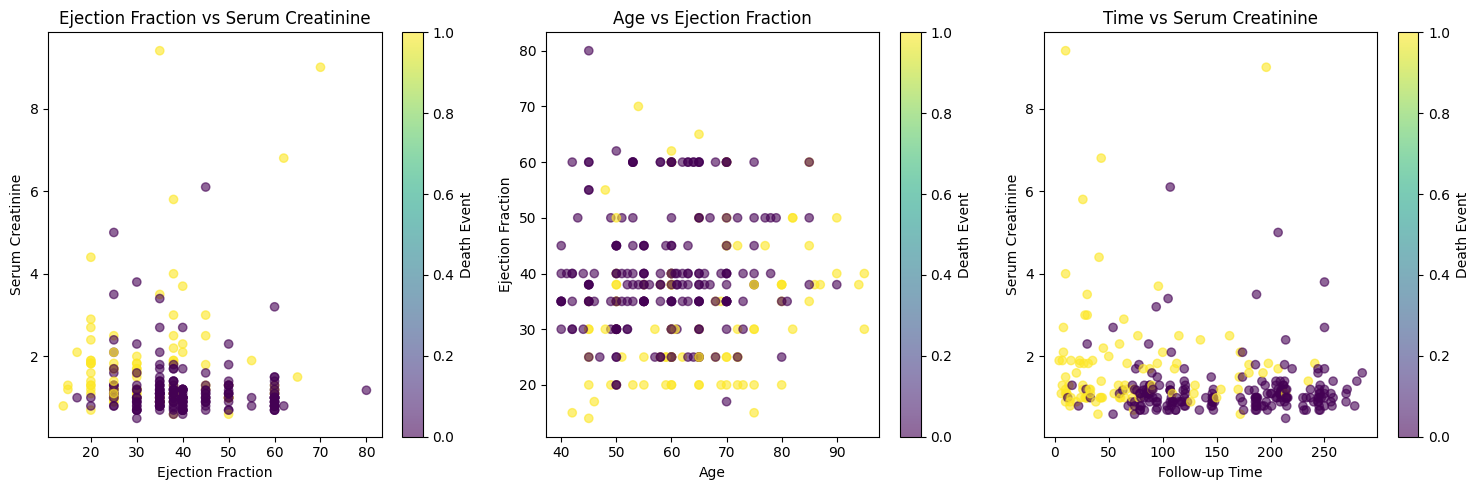

In [10]:
# Important relationships
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['ejection_fraction'], df['serum_creatinine'], 
           c=df['DEATH_EVENT'], cmap='viridis', alpha=0.6)
plt.xlabel('Ejection Fraction')
plt.ylabel('Serum Creatinine')
plt.title('Ejection Fraction vs Serum Creatinine')
plt.colorbar(label='Death Event')

plt.subplot(1, 3, 2)
plt.scatter(df['age'], df['ejection_fraction'], 
           c=df['DEATH_EVENT'], cmap='viridis', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Ejection Fraction')
plt.title('Age vs Ejection Fraction')
plt.colorbar(label='Death Event')

plt.subplot(1, 3, 3)
plt.scatter(df['time'], df['serum_creatinine'], 
           c=df['DEATH_EVENT'], cmap='viridis', alpha=0.6)
plt.xlabel('Follow-up Time')
plt.ylabel('Serum Creatinine')
plt.title('Time vs Serum Creatinine')
plt.colorbar(label='Death Event')

plt.tight_layout()
plt.show()

## Data Preprocessing

In [11]:
# Prepare features and target
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print("\nFeature names:")
print(X.columns.tolist())

Features shape: (299, 12)
Target shape: (299,)

Feature names:
['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']


In [12]:
# Identify feature types
continuous_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 
                      'serum_creatinine', 'serum_sodium', 'time']
binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

print("Continuous features:")
print(continuous_features)
print("\nBinary features:")
print(binary_features)

# Check if all features are accounted for
all_features = continuous_features + binary_features
print(f"\nTotal features: {len(all_features)} (should match {X.shape[1]})")

Continuous features:
['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

Binary features:
['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

Total features: 12 (should match 12)


In [13]:
# Scale continuous features
X_processed = X.copy()
scaler = StandardScaler()

X_processed[continuous_features] = scaler.fit_transform(X[continuous_features])

print("Scaling summary for continuous features:")
print(X_processed[continuous_features].describe())
print("\nBinary features (unchanged):")
print(X_processed[binary_features].describe())

Scaling summary for continuous features:
                age  creatinine_phosphokinase  ejection_fraction  \
count  2.990000e+02                299.000000       2.990000e+02   
mean   5.703353e-16                  0.000000      -3.267546e-17   
std    1.001676e+00                  1.001676       1.001676e+00   
min   -1.754448e+00                 -0.576918      -2.038387e+00   
25%   -8.281242e-01                 -0.480393      -6.841802e-01   
50%   -7.022315e-02                 -0.342574      -7.076750e-03   
75%    7.718891e-01                  0.000166       5.853888e-01   
max    2.877170e+00                  7.514640       3.547716e+00   

          platelets  serum_creatinine  serum_sodium          time  
count  2.990000e+02      2.990000e+02  2.990000e+02  2.990000e+02  
mean   7.723291e-17      1.425838e-16 -8.673849e-16 -1.901118e-16  
std    1.001676e+00      1.001676e+00  1.001676e+00  1.001676e+00  
min   -2.440155e+00     -8.655094e-01 -5.363206e+00 -1.629502e+00  
25%   

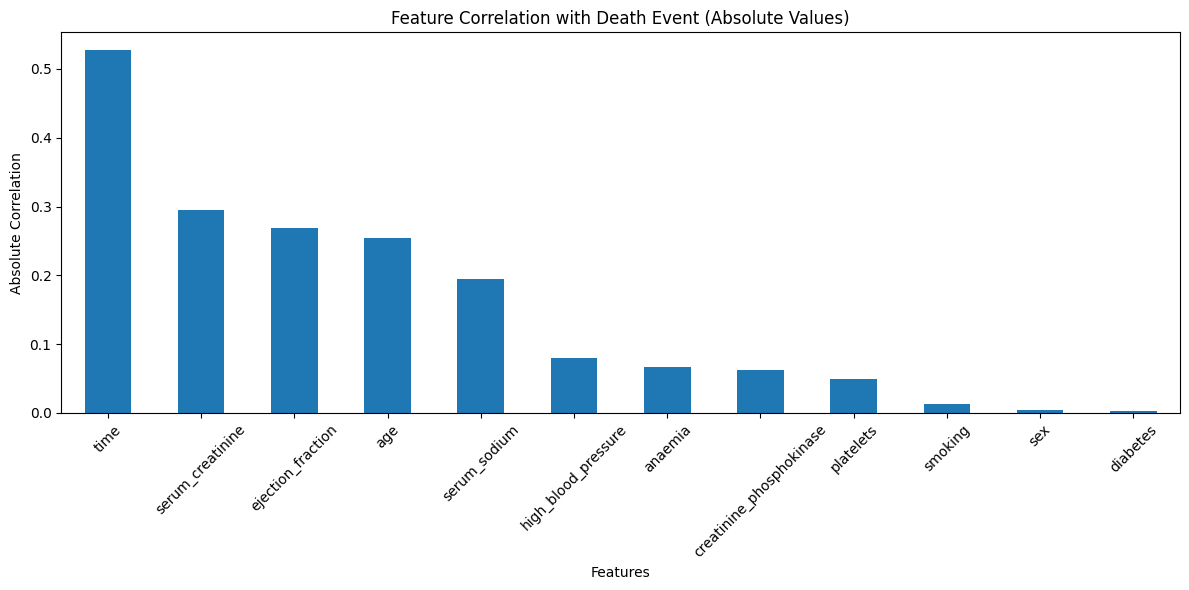

Feature correlations with death event:
time                        0.526964
serum_creatinine            0.294278
ejection_fraction           0.268603
age                         0.253729
serum_sodium                0.195204
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
platelets                   0.049139
smoking                     0.012623
sex                         0.004316
diabetes                    0.001943
dtype: float64


In [14]:
# Feature importance based on correlation with target
feature_correlations = df.drop('DEATH_EVENT', axis=1).corrwith(df['DEATH_EVENT']).abs().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_correlations.plot(kind='bar')
plt.title('Feature Correlation with Death Event (Absolute Values)')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Feature correlations with death event:")
print(feature_correlations)

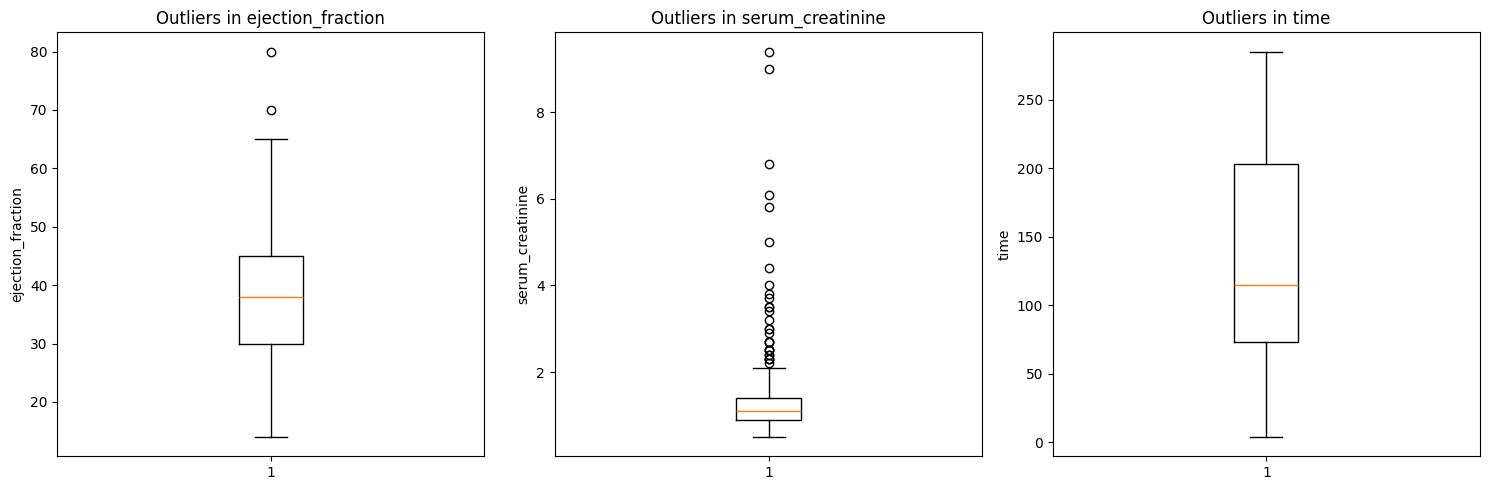

ejection_fraction: 2 outliers (0.7%)
serum_creatinine: 29 outliers (9.7%)
time: 0 outliers (0.0%)


In [15]:
# Check for outliers in key features
key_features = ['ejection_fraction', 'serum_creatinine', 'time']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(key_features):
    axes[i].boxplot(df[feature])
    axes[i].set_title(f'Outliers in {feature}')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

# Print outlier statistics
for feature in key_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"{feature}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")

In [16]:
# Final dataset summary
print("Final processed dataset summary:")
print(f"Total patients: {len(X_processed)}")
print(f"Features: {X_processed.shape[1]}")
print(f"Death events: {y.sum()} ({y.sum()/len(y)*100:.1f}%)")
print(f"Survival cases: {len(y) - y.sum()} ({(len(y) - y.sum())/len(y)*100:.1f}%)")

print("\nTop 5 most correlated features with death event:")
print(feature_correlations.head())

Final processed dataset summary:
Total patients: 299
Features: 12
Death events: 96 (32.1%)
Survival cases: 203 (67.9%)

Top 5 most correlated features with death event:
time                 0.526964
serum_creatinine     0.294278
ejection_fraction    0.268603
age                  0.253729
serum_sodium         0.195204
dtype: float64


## Summary

**Dataset Overview:**
- Total patients: 299 heart failure cases
- Features: 12 clinical measurements
- Target: Death event (0=Survived: 67.9%, 1=Died: 32.1%)

**Data Quality - Excellent:**
- No missing values in any feature
- Realistic clinical ranges for all measurements
- Moderate class imbalance (68-32 split)

**Key Clinical Findings:**
- **Time (follow-up period)**: Most predictive feature
- **Ejection fraction**: Critical heart function indicator
- **Serum creatinine**: Kidney function strongly linked to outcomes
- **Age**: Clear correlation with mortality risk
- **Creatinine phosphokinase**: Elevated levels indicate heart damage

**Feature Correlations with Death Event:**
1. **Time**: Longer follow-up → higher survival probability
2. **Ejection fraction**: Lower EF → higher death risk
3. **Serum creatinine**: Higher levels → higher mortality
4. **Age**: Older patients → increased risk
5. **Other clinical markers**: Moderate predictive value

**Outlier Analysis:**
- **Ejection fraction**: Some very low values (<20%) indicating severe heart failure
- **Serum creatinine**: High outliers (>2.5) indicating kidney dysfunction
- **Time**: Wide range (4-285 days) reflecting different study phases

**Clinical Significance:**
- Survival prediction model with real medical applications
- Features align with established cardiac risk factors
- Could assist in clinical decision-making and patient monitoring

**Modeling Considerations:**
- Small dataset (299 patients) - risk of overfitting
- Use stratified sampling for train-test split
- Consider ensemble methods for robustness
- Focus on recall (sensitivity) to avoid missing high-risk patients

**Next Steps:**
- Apply classification algorithms optimized for medical data
- Use appropriate evaluation metrics (precision, recall, F1, AUC-ROC)
- Consider survival analysis techniques
- Validate results against clinical guidelines
- Feature importance analysis for clinical interpretation